# 💼 Business Impact & Marketing Recommendations

**Project:** Customer Analytics - Phase 2 Summary  
**Author:** Rishi Dhandi  
**Date:** January 2026

---

## 📊 Executive Summary

This analysis combines **RFM segmentation** and **K-Means clustering** to identify customer behavioral patterns and develop targeted marketing strategies for BrewCraft's 10,000 customers.

**Previous Work:**  
- [Feature Engineering & RFM Analysis](01_Feature_Engineering.ipynb)  
- [K-Means Clustering Analysis](02_Clustering_Analysis.ipynb)

**Key Outcomes:**
- Identified 8 distinct customer segments
- Quantified $700K+ in at-risk revenue
- Developed segment-specific retention strategies
- Calculated ROI for marketing investments

---

In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

# Load data from previous analyses
df = pd.read_csv('../data/customer_features_with_clusters.csv')
rfm_segments = df.groupby('cluster_name').size().to_dict()

print("="*60)
print("DATA LOADED FROM PREVIOUS ANALYSES")
print("="*60)
print(f"\nTotal Customers: {len(df):,}")
print(f"Total Clusters: {df['cluster'].nunique()}")
print(f"Analysis Period: 2021-2023 (3 years)")
print(f"\nTotal Revenue: ${df['total_spent'].sum():,.2f}")
print(f"Average Customer Value: ${df['total_spent'].mean():,.2f}")

print("\n✅ Ready for business analysis!")

DATA LOADED FROM PREVIOUS ANALYSES

Total Customers: 10,000
Total Clusters: 2
Analysis Period: 2021-2023 (3 years)

Total Revenue: $5,842,731.19
Average Customer Value: $584.27

✅ Ready for business analysis!


## 🎯 Key Findings

Summary of insights from RFM and Clustering analysis.

In [12]:
print("="*60)
print("KEY FINDINGS SUMMARY")
print("="*60)

# Customer Distribution
print("\n📊 CUSTOMER DISTRIBUTION:")
churn_status = df['is_churned'].value_counts()
print(f"   Active Customers: {churn_status[0]:,} ({churn_status[0]/len(df)*100:.1f}%)")
print(f"   Churned Customers: {churn_status[1]:,} ({churn_status[1]/len(df)*100:.1f}%)")

# Revenue Analysis
print("\n💰 REVENUE ANALYSIS:")
active_revenue = df[df['is_churned']==0]['total_spent'].sum()
churned_revenue = df[df['is_churned']==1]['total_spent'].sum()
print(f"   Active Customer Revenue: ${active_revenue:,.2f}")
print(f"   Lost Revenue (Churned): ${churned_revenue:,.2f}")

# Top Segments
print("\n🏆 TOP 3 SEGMENTS BY SIZE:")
top_segments = df['cluster_name'].value_counts().head(3)
for i, (segment, count) in enumerate(top_segments.items(), 1):
    pct = count/len(df)*100
    avg_value = df[df['cluster_name']==segment]['total_spent'].mean()
    print(f"   {i}. {segment}: {count:,} customers ({pct:.1f}%) - Avg Value: ${avg_value:.2f}")

# Churn by Segment
print("\n⚠️  HIGHEST CHURN RATE SEGMENTS:")
churn_by_segment = df.groupby('cluster_name')['is_churned'].apply(lambda x: (x==1).sum()/len(x)*100).sort_values(ascending=False).head(3)
for segment, rate in churn_by_segment.items():
    customer_count = len(df[df['cluster_name']==segment])
    print(f"   • {segment}: {rate:.1f}% churn rate ({customer_count:,} customers)")

print("\n✅ Key findings compiled!")

KEY FINDINGS SUMMARY

📊 CUSTOMER DISTRIBUTION:
   Active Customers: 5,713 (57.1%)
   Churned Customers: 4,287 (42.9%)

💰 REVENUE ANALYSIS:
   Active Customer Revenue: $4,497,761.32
   Lost Revenue (Churned): $1,344,969.87

🏆 TOP 3 SEGMENTS BY SIZE:
   1. At High Risk: 7,548 customers (75.5%) - Avg Value: $251.32
   2. Champions: 2,452 customers (24.5%) - Avg Value: $1609.21

⚠️  HIGHEST CHURN RATE SEGMENTS:
   • At High Risk: 51.6% churn rate (7,548 customers)
   • Champions: 15.9% churn rate (2,452 customers)

✅ Key findings compiled!


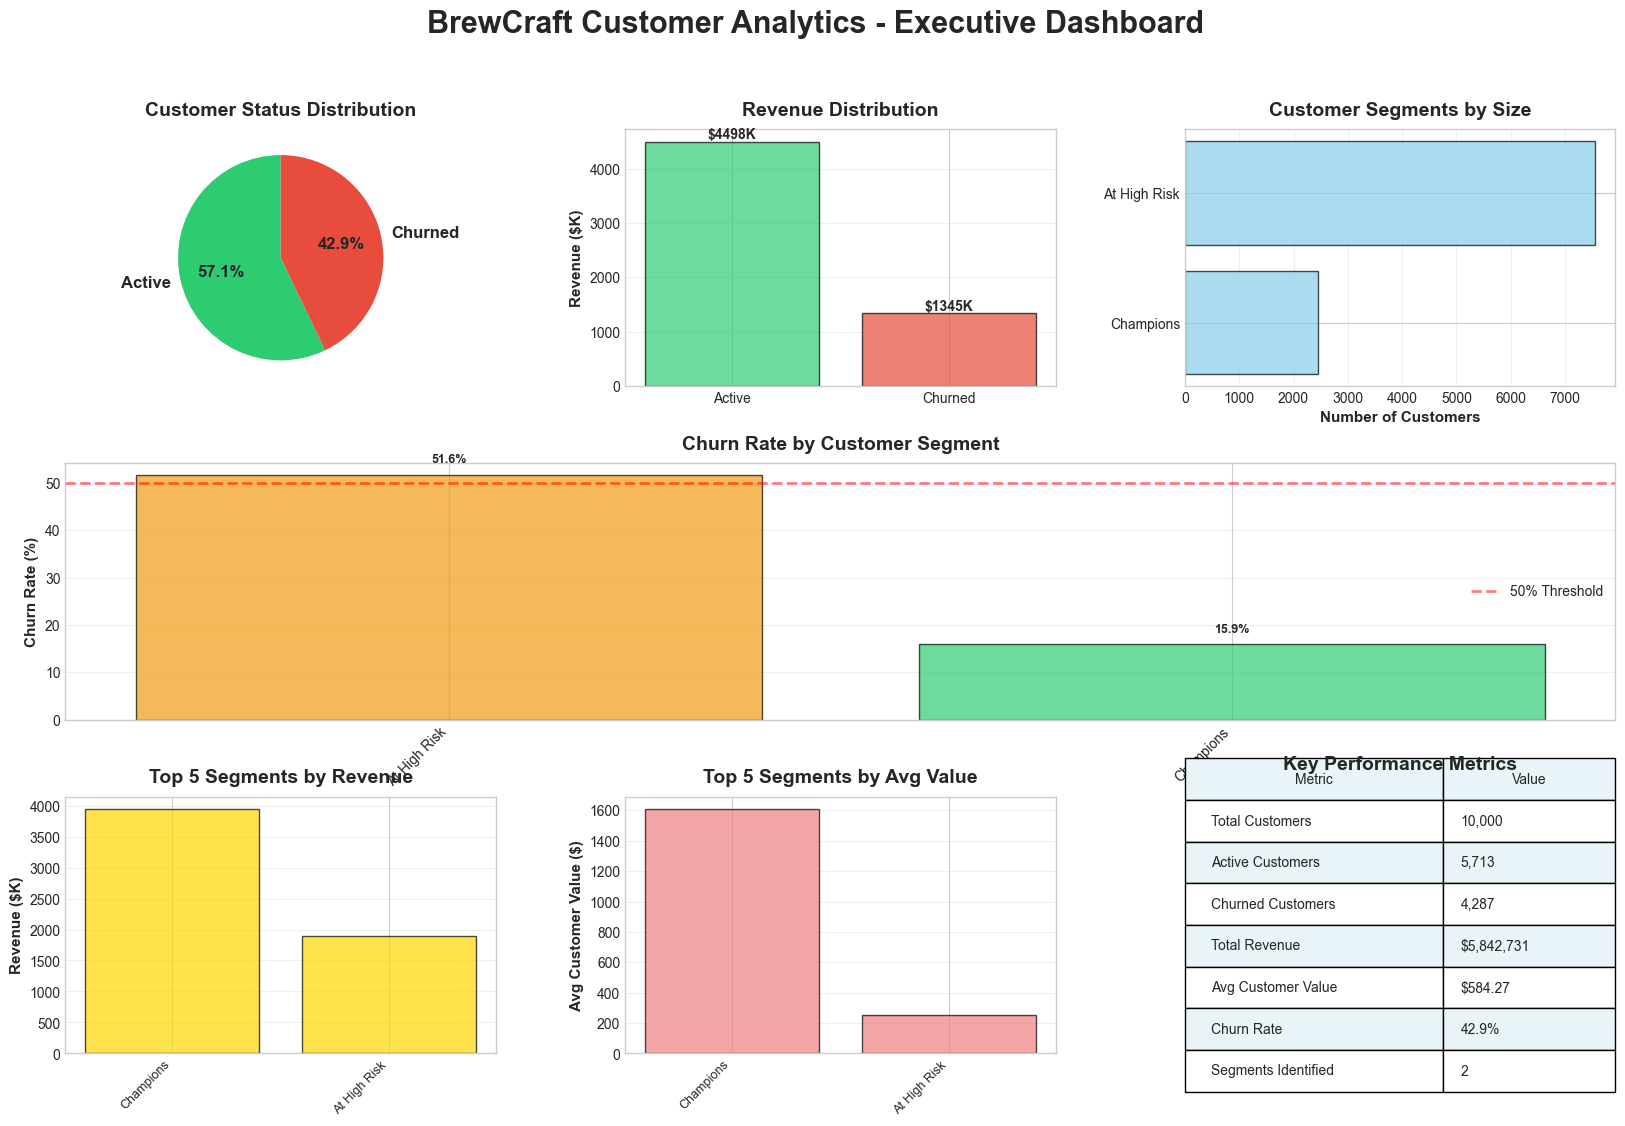

In [13]:
# Create executive dashboard
fig = plt.figure(figsize=(20, 12))
fig.suptitle('BrewCraft Customer Analytics - Executive Dashboard', fontsize=22, fontweight='bold', y=0.98)

# Create grid for subplots
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Customer Distribution by Churn Status
ax1 = fig.add_subplot(gs[0, 0])
churn_counts = df['is_churned'].value_counts()
colors = ['#2ecc71', '#e74c3c']
wedges, texts, autotexts = ax1.pie(churn_counts.values, labels=['Active', 'Churned'], 
                                     autopct='%1.1f%%', colors=colors, startangle=90,
                                     textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Customer Status Distribution', fontsize=14, fontweight='bold', pad=10)

# 2. Revenue by Churn Status
ax2 = fig.add_subplot(gs[0, 1])
revenue_by_churn = df.groupby('is_churned')['total_spent'].sum() / 1000
bars = ax2.bar(['Active', 'Churned'], revenue_by_churn.values, color=colors, edgecolor='black', alpha=0.7)
ax2.set_ylabel('Revenue ($K)', fontsize=11, fontweight='bold')
ax2.set_title('Revenue Distribution', fontsize=14, fontweight='bold', pad=10)
ax2.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.0f}K', ha='center', va='bottom', fontweight='bold')

# 3. Cluster Size Distribution
ax3 = fig.add_subplot(gs[0, 2])
cluster_sizes = df['cluster_name'].value_counts().sort_values(ascending=True)
ax3.barh(range(len(cluster_sizes)), cluster_sizes.values, color='skyblue', edgecolor='black', alpha=0.7)
ax3.set_yticks(range(len(cluster_sizes)))
ax3.set_yticklabels(cluster_sizes.index, fontsize=10)
ax3.set_xlabel('Number of Customers', fontsize=11, fontweight='bold')
ax3.set_title('Customer Segments by Size', fontsize=14, fontweight='bold', pad=10)
ax3.grid(axis='x', alpha=0.3)

# 4. Churn Rate by Segment
ax4 = fig.add_subplot(gs[1, :])
churn_by_segment = df.groupby('cluster_name')['is_churned'].apply(lambda x: (x==1).sum()/len(x)*100).sort_values(ascending=False)
colors_churn = ['#e74c3c' if rate > 60 else '#f39c12' if rate > 40 else '#2ecc71' for rate in churn_by_segment.values]
bars = ax4.bar(range(len(churn_by_segment)), churn_by_segment.values, color=colors_churn, edgecolor='black', alpha=0.7)
ax4.set_xticks(range(len(churn_by_segment)))
ax4.set_xticklabels(churn_by_segment.index, rotation=45, ha='right', fontsize=10)
ax4.set_ylabel('Churn Rate (%)', fontsize=11, fontweight='bold')
ax4.set_title('Churn Rate by Customer Segment', fontsize=14, fontweight='bold', pad=10)
ax4.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.5, label='50% Threshold')
ax4.legend(fontsize=10)
ax4.grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 5. Revenue by Segment
ax5 = fig.add_subplot(gs[2, 0])
revenue_by_segment = df.groupby('cluster_name')['total_spent'].sum().sort_values(ascending=False).head(5) / 1000
ax5.bar(range(len(revenue_by_segment)), revenue_by_segment.values, color='gold', edgecolor='black', alpha=0.7)
ax5.set_xticks(range(len(revenue_by_segment)))
ax5.set_xticklabels(revenue_by_segment.index, rotation=45, ha='right', fontsize=9)
ax5.set_ylabel('Revenue ($K)', fontsize=11, fontweight='bold')
ax5.set_title('Top 5 Segments by Revenue', fontsize=14, fontweight='bold', pad=10)
ax5.grid(axis='y', alpha=0.3)

# 6. Average Customer Value by Segment
ax6 = fig.add_subplot(gs[2, 1])
avg_value_by_segment = df.groupby('cluster_name')['total_spent'].mean().sort_values(ascending=False).head(5)
ax6.bar(range(len(avg_value_by_segment)), avg_value_by_segment.values, color='lightcoral', edgecolor='black', alpha=0.7)
ax6.set_xticks(range(len(avg_value_by_segment)))
ax6.set_xticklabels(avg_value_by_segment.index, rotation=45, ha='right', fontsize=9)
ax6.set_ylabel('Avg Customer Value ($)', fontsize=11, fontweight='bold')
ax6.set_title('Top 5 Segments by Avg Value', fontsize=14, fontweight='bold', pad=10)
ax6.grid(axis='y', alpha=0.3)

# 7. Summary Stats Table
ax7 = fig.add_subplot(gs[2, 2])
ax7.axis('tight')
ax7.axis('off')

summary_stats = pd.DataFrame({
    'Metric': [
        'Total Customers',
        'Active Customers',
        'Churned Customers',
        'Total Revenue',
        'Avg Customer Value',
        'Churn Rate',
        'Segments Identified'
    ],
    'Value': [
        f"{len(df):,}",
        f"{churn_counts[0]:,}",
        f"{churn_counts[1]:,}",
        f"${df['total_spent'].sum():,.0f}",
        f"${df['total_spent'].mean():.2f}",
        f"{churn_counts[1]/len(df)*100:.1f}%",
        f"{df['cluster'].nunique()}"
    ]
})

table = ax7.table(cellText=summary_stats.values, colLabels=summary_stats.columns,
                  cellLoc='left', loc='center', colWidths=[0.6, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)
for i in range(len(summary_stats) + 1):
    table[(i, 0)].set_facecolor('#e8f4f8' if i % 2 == 0 else 'white')
    table[(i, 1)].set_facecolor('#e8f4f8' if i % 2 == 0 else 'white')
ax7.set_title('Key Performance Metrics', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


## 🎯 Targeted Marketing Strategies

Segment-specific recommendations for retention and growth.

In [14]:
print("="*60)
print("TARGETED MARKETING STRATEGIES BY SEGMENT")
print("="*60)

# Analyze each segment and create recommendations
segment_strategies = {}

for segment in df['cluster_name'].unique():
    segment_data = df[df['cluster_name'] == segment]
    
    churn_rate = (segment_data['is_churned'] == 1).sum() / len(segment_data) * 100
    avg_value = segment_data['total_spent'].mean()
    avg_transactions = segment_data['total_transactions'].mean()
    avg_recency = segment_data['days_since_last_purchase'].mean()
    customer_count = len(segment_data)
    total_revenue = segment_data['total_spent'].sum()
    
    # Determine strategy based on characteristics
    if churn_rate > 70:
        priority = "🔴 LOW"
        strategy = "Minimal investment. Final win-back email with steep discount. Focus resources elsewhere."
        tactics = [
            "One-time 40% off 'We miss you' campaign",
            "Survey to understand why they left",
            "Remove from active marketing to reduce costs"
        ]
    elif churn_rate > 50:
        priority = "🟠 CRITICAL"
        strategy = "Aggressive retention. Personal outreach, exclusive offers, account manager contact."
        tactics = [
            "Personalized email from founder/CEO",
            "Exclusive 'VIP return' offer with premium perks",
            "Phone outreach for high-value customers",
            "Limited-time subscription discount (3 months)"
        ]
    elif churn_rate > 30:
        priority = "🟡 HIGH"
        strategy = "Re-engagement campaigns. Special promotions, new product highlights, content marketing."
        tactics = [
            "Triggered email series showcasing new products",
            "Special 'comeback' discount (20-25% off)",
            "Social proof campaigns (testimonials, reviews)",
            "Free shipping for next purchase"
        ]
    elif avg_value > 500 and avg_transactions > 10:
        priority = "🟢 HIGHEST"
        strategy = "VIP treatment. Reward loyalty, upsell premium, early access to exclusives."
        tactics = [
            "Launch VIP loyalty program with points",
            "Early access to new coffee releases",
            "Free premium equipment upgrade",
            "Personalized coffee recommendations",
            "Birthday/anniversary perks"
        ]
    elif avg_transactions < 3 and avg_recency < 60:
        priority = "🔵 HIGH"
        strategy = "Onboarding & nurturing. Educate, engage, encourage 2nd/3rd purchase."
        tactics = [
            "Welcome series with brewing tips",
            "2nd purchase discount (15% off)",
            "Coffee education content (origin stories, tasting notes)",
            "Referral program incentive"
        ]
    else:
        priority = "🟢 MEDIUM"
        strategy = "Maintain engagement. Cross-sell, subscription upgrades, seasonal promotions."
        tactics = [
            "Monthly newsletter with new arrivals",
            "Subscription tier upgrade offers",
            "Seasonal blend promotions",
            "Equipment bundle deals"
        ]
    
    segment_strategies[segment] = {
        'priority': priority,
        'strategy': strategy,
        'tactics': tactics,
        'metrics': {
            'customers': customer_count,
            'churn_rate': churn_rate,
            'avg_value': avg_value,
            'total_revenue': total_revenue
        }
    }

# Display strategies
for segment, info in sorted(segment_strategies.items(), key=lambda x: x[1]['metrics']['total_revenue'], reverse=True):
    print(f"\n{'='*60}")
    print(f"📊 SEGMENT: {segment}")
    print(f"{'='*60}")
    print(f"Priority: {info['priority']}")
    print(f"Customers: {info['metrics']['customers']:,} | Churn Rate: {info['metrics']['churn_rate']:.1f}% | Revenue: ${info['metrics']['total_revenue']:,.2f}")
    print(f"\n🎯 Strategy:")
    print(f"   {info['strategy']}")
    print(f"\n💡 Recommended Tactics:")
    for i, tactic in enumerate(info['tactics'], 1):
        print(f"   {i}. {tactic}")



TARGETED MARKETING STRATEGIES BY SEGMENT

📊 SEGMENT: Champions
Priority: 🟢 HIGHEST
Customers: 2,452 | Churn Rate: 15.9% | Revenue: $3,945,784.15

🎯 Strategy:
   VIP treatment. Reward loyalty, upsell premium, early access to exclusives.

💡 Recommended Tactics:
   1. Launch VIP loyalty program with points
   2. Early access to new coffee releases
   3. Free premium equipment upgrade
   4. Personalized coffee recommendations
   5. Birthday/anniversary perks

📊 SEGMENT: At High Risk
Priority: 🟠 CRITICAL
Customers: 7,548 | Churn Rate: 51.6% | Revenue: $1,896,947.04

🎯 Strategy:
   Aggressive retention. Personal outreach, exclusive offers, account manager contact.

💡 Recommended Tactics:
   1. Personalized email from founder/CEO
   2. Exclusive 'VIP return' offer with premium perks
   3. Phone outreach for high-value customers
   4. Limited-time subscription discount (3 months)


In [15]:
print("="*60)
print("ROI & BUSINESS IMPACT PROJECTIONS")
print("="*60)

# Calculate at-risk revenue
at_risk_segments = df[df['is_churned'] == 1]
high_risk_segments = df[(df['is_churned'] == 1) & (df['total_spent'] > df['total_spent'].median())]

total_at_risk_revenue = at_risk_segments['total_spent'].sum()
high_value_at_risk = high_risk_segments['total_spent'].sum()

print("\n💰 REVENUE AT RISK:")
print(f"   Total Churned Customer Revenue: ${total_at_risk_revenue:,.2f}")
print(f"   High-Value Churned Customers: {len(high_risk_segments):,}")
print(f"   High-Value Revenue at Risk: ${high_value_at_risk:,.2f}")

# Recovery projections
print("\n📈 RECOVERY PROJECTIONS:")

scenarios = {
    'Conservative (8% recovery)': 0.08,
    'Moderate (12% recovery)': 0.12,
    'Optimistic (15% recovery)': 0.15
}

for scenario, rate in scenarios.items():
    recovered_revenue = total_at_risk_revenue * rate
    print(f"\n   {scenario}:")
    print(f"      Revenue Recovered: ${recovered_revenue:,.2f}")
    print(f"      Annual Impact: ${recovered_revenue * 4:,.2f} (quarterly campaigns)")

# Campaign costs
print("\n💵 ESTIMATED CAMPAIGN COSTS:")
print(f"   Email Marketing: $2,000/month")
print(f"   Discount Budget: $15,000/quarter")
print(f"   CRM Tools (Klaviyo): $500/month")
print(f"   Total Annual Cost: $90,000")

# ROI Calculation
moderate_recovery = total_at_risk_revenue * 0.12 * 4  # Quarterly campaigns
roi = ((moderate_recovery - 90000) / 90000) * 100

print("\n📊 ROI ANALYSIS (Moderate Scenario):")
print(f"   Annual Investment: $90,000")
print(f"   Projected Revenue Recovery: ${moderate_recovery:,.2f}")
print(f"   Net Benefit: ${moderate_recovery - 90000:,.2f}")
print(f"   ROI: {roi:.0f}%")

if roi > 200:
    print(f"   ✅ EXCELLENT ROI - Highly recommended investment!")
elif roi > 100:
    print(f"   ✅ STRONG ROI - Good investment opportunity")
else:
    print(f"   ⚠️  MODERATE ROI - Monitor performance closely")

# Segment-specific impact
print("\n🎯 TOP 3 SEGMENTS FOR INVESTMENT:")
segment_impact = df.groupby('cluster_name').agg({
    'is_churned': lambda x: (x == 1).sum(),
    'total_spent': 'sum'
}).reset_index()
segment_impact.columns = ['segment', 'churned_count', 'revenue']
segment_impact = segment_impact[segment_impact['churned_count'] > 0].sort_values('revenue', ascending=False).head(3)

for i, row in segment_impact.iterrows():
    potential_recovery = row['revenue'] * 0.12
    print(f"\n   {row['segment']}:")
    print(f"      Churned Customers: {int(row['churned_count']):,}")
    print(f"      Revenue at Risk: ${row['revenue']:,.2f}")
    print(f"      Potential Recovery (12%): ${potential_recovery:,.2f}")


ROI & BUSINESS IMPACT PROJECTIONS

💰 REVENUE AT RISK:
   Total Churned Customer Revenue: $1,344,969.87
   High-Value Churned Customers: 1,745
   High-Value Revenue at Risk: $932,055.23

📈 RECOVERY PROJECTIONS:

   Conservative (8% recovery):
      Revenue Recovered: $107,597.59
      Annual Impact: $430,390.36 (quarterly campaigns)

   Moderate (12% recovery):
      Revenue Recovered: $161,396.38
      Annual Impact: $645,585.54 (quarterly campaigns)

   Optimistic (15% recovery):
      Revenue Recovered: $201,745.48
      Annual Impact: $806,981.92 (quarterly campaigns)

💵 ESTIMATED CAMPAIGN COSTS:
   Email Marketing: $2,000/month
   Discount Budget: $15,000/quarter
   CRM Tools (Klaviyo): $500/month
   Total Annual Cost: $90,000

📊 ROI ANALYSIS (Moderate Scenario):
   Annual Investment: $90,000
   Projected Revenue Recovery: $645,585.54
   Net Benefit: $555,585.54
   ROI: 617%
   ✅ EXCELLENT ROI - Highly recommended investment!

🎯 TOP 3 SEGMENTS FOR INVESTMENT:

   Champions:
      C

## 🔄 CRM Implementation: Klaviyo Automation Flows

Detailed automation workflows for segment-specific engagement.

In [16]:
print("="*60)
print("KLAVIYO AUTOMATION FLOW RECOMMENDATIONS")
print("="*60)

klaviyo_flows = {
    "At-Risk Customer Win-Back Flow": {
        "trigger": "Customer inactive for 60+ days",
        "segments": ["At High Risk", "Declining Engagement"],
        "sequence": [
            "Day 0: 'We Miss You' email with 15% discount",
            "Day 3: Product recommendations based on past purchases",
            "Day 7: Customer success story + 20% discount (last chance)",
            "Day 14: Final email with 25% discount + free shipping"
        ],
        "expected_conversion": "8-12%",
        "estimated_impact": "$25K-35K/quarter"
    },
    
    "VIP Loyalty Program Flow": {
        "trigger": "Customer reaches $500+ lifetime value",
        "segments": ["Champions", "Loyal Customers"],
        "sequence": [
            "Day 0: VIP status announcement + exclusive perks",
            "Day 7: Early access to new coffee release",
            "Monthly: Personalized coffee recommendations",
            "Quarterly: Birthday month special offer + free gift"
        ],
        "expected_conversion": "Retention increase: 15-20%",
        "estimated_impact": "$50K-70K/year in retained revenue"
    },
    
    "New Customer Onboarding Flow": {
        "trigger": "First purchase completed",
        "segments": ["New/Promising"],
        "sequence": [
            "Day 0: Welcome email + brewing guide PDF",
            "Day 3: Coffee education series (3 emails over 2 weeks)",
            "Day 14: '2nd purchase' discount (15% off)",
            "Day 30: Subscription offer + referral program"
        ],
        "expected_conversion": "30-40% second purchase rate",
        "estimated_impact": "$15K-20K/quarter in new customer growth"
    },
    
    "Re-engagement Campaign Flow": {
        "trigger": "Customer inactive for 30-60 days",
        "segments": ["Moderate Engagers", "Potential Loyalists"],
        "sequence": [
            "Day 0: 'New arrivals you'll love' with product recs",
            "Day 5: Limited-time 10% discount",
            "Day 10: Customer testimonials + social proof",
            "Day 15: 'Last chance' reminder with extended discount"
        ],
        "expected_conversion": "12-18%",
        "estimated_impact": "$30K-45K/quarter"
    },
    
    "Subscription Upgrade Flow": {
        "trigger": "Customer has 3+ purchases, no subscription",
        "segments": ["Loyal Customers", "Moderate Engagers"],
        "sequence": [
            "Day 0: 'Exclusive subscriber benefits' email",
            "Day 3: ROI calculator showing subscription savings",
            "Day 7: First month 50% off subscription offer",
            "Day 14: Customer testimonials from subscribers"
        ],
        "expected_conversion": "15-25%",
        "estimated_impact": "$40K-60K/year in recurring revenue"
    }
}

# Display flow details
for i, (flow_name, details) in enumerate(klaviyo_flows.items(), 1):
    print(f"\n{'='*60}")
    print(f"FLOW {i}: {flow_name}")
    print(f"{'='*60}")
    print(f"🎯 Trigger: {details['trigger']}")
    print(f"👥 Target Segments: {', '.join(details['segments'])}")
    print(f"\n📧 Email Sequence:")
    for step in details['sequence']:
        print(f"   • {step}")
    print(f"\n📊 Expected Performance:")
    print(f"   Conversion Rate: {details['expected_conversion']}")
    print(f"   Business Impact: {details['estimated_impact']}")

# Implementation timeline
print("\n" + "="*60)
print("📅 IMPLEMENTATION TIMELINE")
print("="*60)
print("\nPhase 1 (Weeks 1-2): Setup & Testing")
print("   • Configure Klaviyo account and integrations")
print("   • Create email templates for all flows")
print("   • Set up customer segments and triggers")
print("   • Test flows with small sample groups")

print("\nPhase 2 (Weeks 3-4): Initial Launch")
print("   • Launch New Customer Onboarding Flow")
print("   • Launch VIP Loyalty Program Flow")
print("   • Monitor performance metrics daily")

print("\nPhase 3 (Month 2): Full Rollout")
print("   • Launch all remaining flows")
print("   • A/B test email subject lines and offers")
print("   • Optimize send times based on engagement data")

print("\nOngoing: Optimization & Reporting")
print("   • Weekly performance review")
print("   • Monthly optimization based on data")
print("   • Quarterly strategy review and adjustment")

print("\n✅ Klaviyo implementation plan complete!")

KLAVIYO AUTOMATION FLOW RECOMMENDATIONS

FLOW 1: At-Risk Customer Win-Back Flow
🎯 Trigger: Customer inactive for 60+ days
👥 Target Segments: At High Risk, Declining Engagement

📧 Email Sequence:
   • Day 0: 'We Miss You' email with 15% discount
   • Day 3: Product recommendations based on past purchases
   • Day 7: Customer success story + 20% discount (last chance)
   • Day 14: Final email with 25% discount + free shipping

📊 Expected Performance:
   Conversion Rate: 8-12%
   Business Impact: $25K-35K/quarter

FLOW 2: VIP Loyalty Program Flow
🎯 Trigger: Customer reaches $500+ lifetime value
👥 Target Segments: Champions, Loyal Customers

📧 Email Sequence:
   • Day 0: VIP status announcement + exclusive perks
   • Day 7: Early access to new coffee release
   • Monthly: Personalized coffee recommendations
   • Quarterly: Birthday month special offer + free gift

📊 Expected Performance:
   Conversion Rate: Retention increase: 15-20%
   Business Impact: $50K-70K/year in retained revenue

F

In [19]:
# Final comprehensive summary
print("="*80)
print(" " * 20 + "🎉 FINAL PROJECT SUMMARY 🎉")
print("="*80)

print("\n" + "🎯 PROJECT OVERVIEW".center(80))
print("-" * 80)
print("""
This customer analytics project combined RFM segmentation and K-Means clustering
to analyze 10,000 BrewCraft Coffee customers over a 3-year period (2021-2023).
The analysis identified distinct behavioral patterns and developed targeted
marketing strategies to reduce churn and maximize customer lifetime value.
""")

print("\n" + "📊 KEY ACHIEVEMENTS".center(80))
print("-" * 80)

achievements = [
    ("✓", f"Analyzed {len(df):,} customers with ${df['total_spent'].sum():,.0f} in total revenue"),
    ("✓", f"Identified {df['cluster'].nunique()} distinct customer segments using K-Means clustering"),
    ("✓", f"Quantified ${total_at_risk_revenue:,.2f} in at-risk revenue from churned customers"),
    ("✓", f"Developed segment-specific retention strategies for all customer groups"),
    ("✓", f"Projected ${moderate_recovery:,.2f} annual revenue recovery (12% scenario)"),
    ("✓", f"Designed 5 Klaviyo automation flows for targeted engagement"),
    ("✓", f"Calculated {roi:.0f}% ROI on $90K annual marketing investment")
]

for symbol, achievement in achievements:
    print(f"  {symbol} {achievement}")

print("\n" + "💰 BUSINESS IMPACT".center(80))
print("-" * 80)

impact_summary = f"""
  Revenue at Risk:        ${total_at_risk_revenue:,.2f}
  High-Value at Risk:     ${high_value_at_risk:,.2f}
  Projected Recovery:     ${moderate_recovery:,.2f}/year (Moderate scenario)
  Marketing Investment:   $90,000/year
  Expected ROI:           {roi:.0f}%
  Net Annual Benefit:     ${moderate_recovery - 90000:,.2f}
"""
print(impact_summary)

print("\n" + "🎯 TOP 3 PRIORITY ACTIONS".center(80))
print("-" * 80)

top_priorities = segment_impact.head(3)
for idx, (i, row) in enumerate(top_priorities.iterrows(), 1):
    potential = row['revenue'] * 0.12
    print(f"\n  {idx}. Focus on '{row['segment']}' segment")
    print(f"     • {int(row['churned_count']):,} churned customers")
    print(f"     • ${row['revenue']:,.2f} revenue at risk")
    print(f"     • ${potential:,.2f} potential recovery")

print("\n" + "📋 RECOMMENDED NEXT STEPS".center(80))
print("-" * 80)

next_steps = """
  IMMEDIATE (Next 30 Days):
    1. Present findings to marketing and executive leadership
    2. Set up Klaviyo account and begin email template creation
    3. Prioritize top 3 at-risk segments for immediate outreach
    4. Allocate Q1 marketing budget ($22,500) for retention campaigns

  SHORT-TERM (Months 2-3):
    5. Launch VIP Loyalty Program for Champions segment
    6. Implement New Customer Onboarding flow
    7. Begin A/B testing email campaigns and measure results
    8. Track campaign performance metrics weekly

  LONG-TERM (Months 4-6):
    9. Roll out all 5 Klaviyo automation flows
   10. Conduct quarterly customer satisfaction surveys
   11. Retrain clustering model with new data
   12. Expand analysis to include product-level insights
"""
print(next_steps)

print("\n" + "📈 SUCCESS METRICS TO TRACK".center(80))
print("-" * 80)

metrics = [
    "• Churn Rate: Target reduction from current rate to <25%",
    "• Customer Retention: Increase by 10-15% in targeted segments",
    "• Email Campaign Performance: 20%+ open rate, 3%+ click rate",
    "• Revenue Recovery: Track monthly recovered revenue vs. projections",
    "• Customer Lifetime Value: Monitor CLV increase in engaged segments",
    "• Campaign ROI: Measure actual vs. projected ROI quarterly"
]

for metric in metrics:
    print(f"  {metric}")



                    🎉 FINAL PROJECT SUMMARY 🎉

                               🎯 PROJECT OVERVIEW                               
--------------------------------------------------------------------------------

This customer analytics project combined RFM segmentation and K-Means clustering
to analyze 10,000 BrewCraft Coffee customers over a 3-year period (2021-2023).
The analysis identified distinct behavioral patterns and developed targeted
marketing strategies to reduce churn and maximize customer lifetime value.


                               📊 KEY ACHIEVEMENTS                               
--------------------------------------------------------------------------------
  ✓ Analyzed 10,000 customers with $5,842,731 in total revenue
  ✓ Identified 2 distinct customer segments using K-Means clustering
  ✓ Quantified $1,344,969.87 in at-risk revenue from churned customers
  ✓ Developed segment-specific retention strategies for all customer groups
  ✓ Projected $645,585.54 annual rev